
# MVP: *Machine Learning & Analytics*

- **Código da Disciplina:** 40530010056_20250_01

- **Autor:** André Ferreira do Nascimento  

- **Matrícula**: 4052024001196

- **Data:** 14/09/2025




# DEFINING THE PROBLEM

# Problem description

I will analyze subscription service customer churn data. Our main goal is to identify potential churners before they leave the service, enabling interventions to increase retention. The classification tag (**“likely to churn” / “not likely to churn”**) will serve as a valuable input for other business areas. For example, customer support could handle tickets from at-risk customers with extra care, while marketing might encourage engagement through personalized promotions or content recommendations.

To generate this tag, I will leverage existing data on churned customers and train a machine learning model designed for **categorical classification problems**.

# Premises / Hyposetheses

**Premises:**
- Younger and premium customers have more potential to yield revenue.

**Hypotheses:**
- Churned customers are likely to show identifiable behavioral patterns, such as reduced service usage, increased contact with customer support, and lower service ratings.

- To achieve satisfactory results with the machine learning model, I will need to balance the dataset, since the number of non-churned customers typically largely exceeds that of churned customers.

For this study, I will focus on a subset of data representing high-ticket clients who also have the potential to remain with the service for an extended period of time. By high-ticket, I mean customers with a Premium subscription, as I do not have direct income information. By potential to stay for an extended period, I refer to customers who are at an early stage of adult life but are old enough to afford the service independently.

I will then select features that show distinct behaviors between churned and non-churned customers to use as inputs for our machine learning model.

**For this section, I will pass through this steps:**

1.1) Load the data

1.2) Inspect the data

1.3) Define the subset of the data I will work with

1.4) Define initial features I will use for the Machine Learning model

In [1]:
# Importing modules

# For data access
import kagglehub
import os

# For data inspection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For bulding and evaluating the Machine learning model

# For preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight

## Selected models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# For model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

## For cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# For feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer

# Hide user warnings during code execution
import warnings
warnings.filterwarnings('ignore')

# **1.1) LOAD THE DATA**

In [2]:
# Downloading the metadata and the dataset from kaggle
path = kagglehub.dataset_download("safrin03/predictive-analytics-for-customer-churn-dataset")

100%|██████████| 24.0M/24.0M [00:00<00:00, 77.2MB/s]

Extracting files...


In [3]:
# Loading and showing the variables descriptions
meta_data = pd.read_csv(os.path.join(path, 'data_descriptions.csv'))
pd.set_option('display.max_colwidth', None) # Making sure all text is visible.
meta_data

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


In [4]:
# Loading the actual data set

churn_data = pd.read_csv(os.path.join(path, 'train.csv'))
churn_data.head(5)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


# **1.2) INSPECT THE DATA**

In [5]:
# Checking number of rows and columns
churn_data.shape

(243787, 21)

There are almost 250,000 records. I will select a subset of the data relevant to the problem I am aiming to solve.

In [6]:
# Checking for null values
churn_data.isnull().sum()

,0
AccountAge,0
MonthlyCharges,0
TotalCharges,0
SubscriptionType,0
PaymentMethod,0
PaperlessBilling,0
ContentType,0
MultiDeviceAccess,0
DeviceRegistered,0
ViewingHoursPerWeek,0


In [7]:
# Checking for data discrepancies to allow the selection of a subset of the data, so I can work with less registers than the original 250k
churn_data.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [8]:
# Checking for unique values counts
churn_data.nunique()

,0
AccountAge,119
MonthlyCharges,243787
TotalCharges,243787
SubscriptionType,3
PaymentMethod,4
PaperlessBilling,2
ContentType,3
MultiDeviceAccess,2
DeviceRegistered,4
ViewingHoursPerWeek,243787


In [9]:
# Checking for imbalances in the target variable by couting '0' and '1' records.
churn_data['Churn'].value_counts()

,count
Churn,
0,199605
1,44182


The current dataset contains almost 250,000 records, and the target variable (churn) shows that I am dealing with an **imbalanced dataset**. There are no null values, which is positive. However, it is noticeable that the variable age has a much higher number of unique values than expected. Among the numerical variables, TotalCharges shows the widest range.

Based on my earlier premises and these findings, I will select a **subset of the dataset using the following variables: 'subscription type', 'age'and 'TotalChargers'**.

I am doing so because I want to address a specific problem: preventing the churn of high-value users. These are customers who:

- Have a Premium subscription,

- Are young but financially independent (20 to 30 years old), and

- Are still relatively new to the service (indicated by a low TotalCharges value).

By focusing on this group, I aim to retain customers with the highest potential lifetime value for the business.

# 1.3) Define the subset of the data I will work with

**RESTRICTIONS:**
- Problem-solving requires models and/or techniques that can handle imbalanced datasets.
- The training dataset will be restricted to:

**'SubscriptionType'** = Premium

**'AccountAge'** between 20 and 30 years old

**'TotalChargers'** <= $ 329.14 (quantile 0.25)

In [10]:
# Selecting the data set based on the restrictions listed
customer_recent_premium_age_20to30 = churn_data[
    (churn_data['SubscriptionType'] == 'Premium') &
    (churn_data['AccountAge'] >= 20) &
    (churn_data['AccountAge'] <= 30) &
    (churn_data['TotalCharges'] <= churn_data['TotalCharges'].quantile(0.25))

]

# Resetting the index
customer_recent_premium_age_20to30.reset_index(drop = True, inplace = True)

# Checking if the code worked and how many rows are in the data subset
customer_recent_premium_age_20to30.shape

(4112, 21)

In [11]:
# Checking if the data subset kept the imbalance in the target variable
customer_recent_premium_age_20to30['Churn'].value_counts()

,count
Churn,
0,3227
1,885


**NOTES ON THE SELECTED SEBSET**

The new dataset has 4,112 records and also maintains the imbalanced nature of the target variable ('Churn').

# 1.4) Define initial features I will use for the Machine Learning model

In [12]:
# Checking all current variables in the data
customer_recent_premium_age_20to30.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

In [13]:
# Defining varaibles as features (removing target variable 'Churn' and unique identifier 'CustomerID')
model_features = customer_recent_premium_age_20to30.drop(columns=['Churn', 'CustomerID'])

# Storing target variable
target = customer_recent_premium_age_20to30['Churn']

# Segmenting the numerical features
numeric_features = [
    'AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize'
]

# Segmenting the categorical features
categorical_features = []

for col in model_features.columns:
  if col not in numeric_features:
    categorical_features.append(col)

# Displaying categorial features to check if the code worked
categorical_features

['SubscriptionType',
 'PaymentMethod',
 'PaperlessBilling',
 'ContentType',
 'MultiDeviceAccess',
 'DeviceRegistered',
 'GenrePreference',
 'Gender',
 'ParentalControl',
 'SubtitlesEnabled']

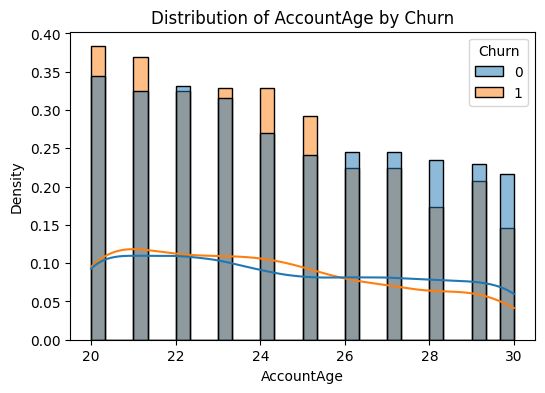

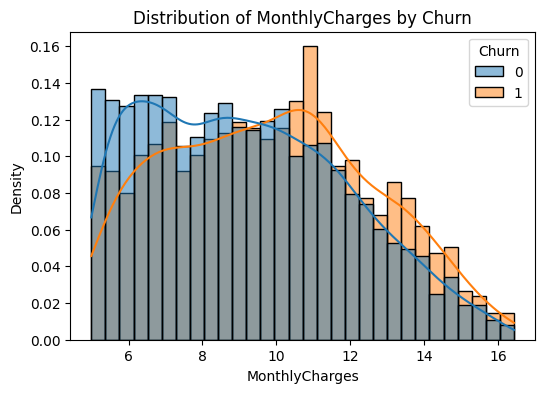

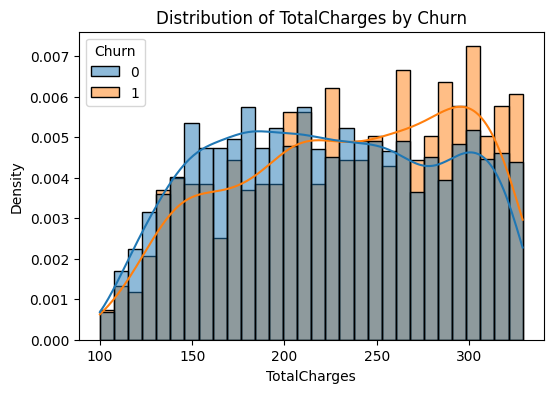

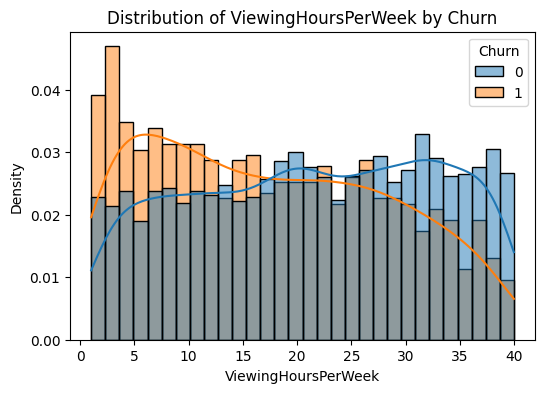

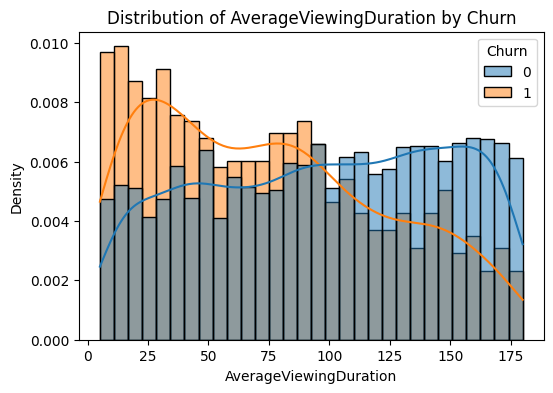

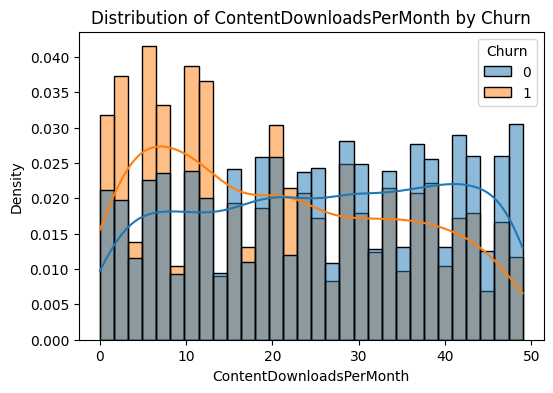

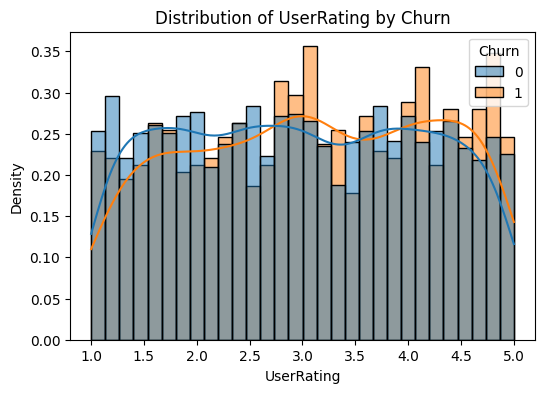

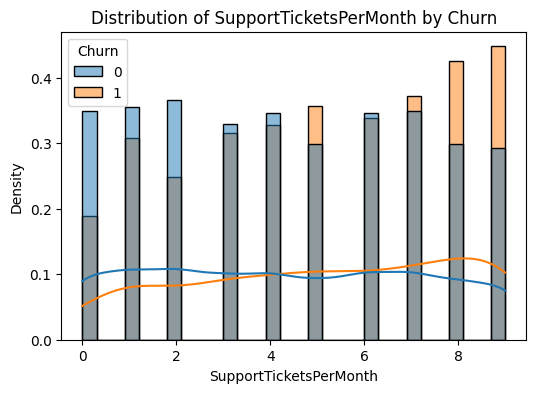

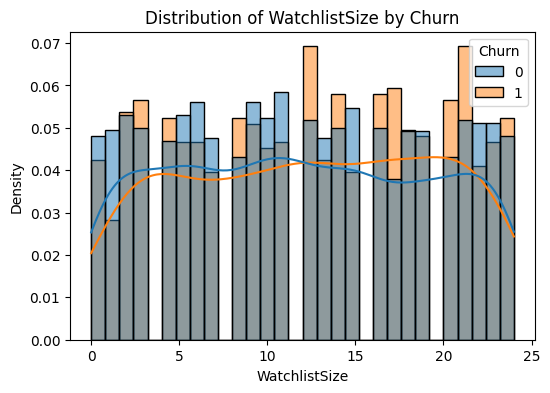

In [14]:
# Plotting numeric features into histogram, so I can identify patterns in the data

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=customer_recent_premium_age_20to30, x=col, hue='Churn',
                 kde=True, bins=30, stat='density', common_norm=False)
    plt.title(f"Distribution of {col} by Churn") # Name each plot with the feature name
    plt.show()

In [15]:
# For categorical variables, I will create frequency tables to see how the are distributed among the two different classes (churned and not churned)

for col in categorical_features:
    # Create a frequency table based on churn frequency and each categorical feature
    frequency_table = pd.crosstab(churn_data[col],
                     churn_data['Churn'])

    # Normalize the frequency to display it as a % instead of an absolute value
    percentage = frequency_table.div(frequency_table.sum(axis=1), axis=0).round(3) * 100

    # Consolidate frequency table with the calculated %
    frequency_table = pd.concat([percentage], axis=1, keys=['%'])

    print(f"{col}")
    display(frequency_table)

SubscriptionType


%      
Churn                0     1
SubscriptionType            
Basic             80.3  19.7
Premium           83.7  16.3
Standard          81.6  18.4

PaymentMethod


%      
Churn                0     1
PaymentMethod               
Bank transfer     82.1  17.9
Credit card       83.8  16.2
Electronic check  80.8  19.2
Mailed check      80.9  19.1

PaperlessBilling


%      
Churn                0     1
PaperlessBilling            
No                81.8  18.2
Yes               81.9  18.1

ContentType


%      
Churn           0     1
ContentType            
Both         81.2  18.8
Movies       82.2  17.8
TV Shows     82.3  17.7

MultiDeviceAccess


%      
Churn                 0     1
MultiDeviceAccess            
No                 81.8  18.2
Yes                81.9  18.1

DeviceRegistered


%      
Churn                0     1
DeviceRegistered            
Computer          81.9  18.1
Mobile            81.8  18.2
TV                82.1  17.9
Tablet            81.8  18.2

GenrePreference


%      
Churn               0     1
GenrePreference            
Action           83.4  16.6
Comedy           80.7  19.3
Drama            82.1  17.9
Fantasy          82.3  17.7
Sci-Fi           80.9  19.1

Gender


%      
Churn      0     1
Gender            
Female  82.2  17.8
Male    81.6  18.4

ParentalControl


%      
Churn               0     1
ParentalControl            
No               81.7  18.3
Yes              82.1  17.9

SubtitlesEnabled


%      
Churn                0     1
SubtitlesEnabled            
No                81.4  18.6
Yes               82.4  17.6

The numeric features show clear patterns that distinguish churned users from non-churned users.

Churned users tend to:

**(1)** Be concentrated on the younger side of the analyzed group,

**(2)** Have higher monthly and overall service bills,

**(3)** Use the service less frequently and for shorter durations,

**(4)** Download less content,

**(5)** Report lower satisfaction levels,

**(6)** Open more support tickets.

The Watchlist feature does not show a clear pattern and will be discarded as a predictor.

Categorical data is less conclusive, as most patterns appear very similar when comparing churned and non-churned users. Many of these variables are likely to increase the model’s complexity without adding significant explanatory power. Therefore, I will not include them in the machine learning model.

In [16]:
# Creating a list of features to drop, including 'WatchlistSize' and the categorical features
features_to_drop = ['WatchlistSize'] + categorical_features

# Droping the specified columns from model_features
model_features = model_features.drop(columns=features_to_drop)

# Checking if the code worked
model_features.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth'],
      dtype='object')

By studying the selected subset of data, I retained 8 variables to begin the next step of our study. These variables are listed below:

- 'AccountAge'
- 'MonthlyCharges'
- 'TotalCharges'
- 'ViewingHoursPerWeek'
- 'AverageViewingDuration'
- 'ContentDownloadsPerMonth'
- 'UserRating'
- 'SupportTicketsPerMonth'

## DATA PREPARATION, MODELING AND TRAINING

I am dealing with a **categorical problem**: the objective is to classify a potential churner (1) versus a customer unlikely to churn (0). Since the target variable is imbalanced, I will select algorithms that can handle categorical classification while also supporting class-weight adjustments. Therefore, I will compare three algorithms for this problem:**Logistic Regression (LR), Gradiant Booster (GBC), and Support Vector Machine (SVM)**.

For evaluation, I will use **Recall** as the success metric. Accuracy would not be ideal given the imbalance (with fewer churn cases than non-churn cases). Recall is more appropriate in this context because missing a true positive (a customer likely to churn) is significantly more concerning than misclassifying a non-churner as a churner. I'm assuming that the cost to acquire a new customer or bringing one back after he/she has abandoned the service is far superior than giving a courtesy that would make this customer stay in the first place.

I will start by testing whether our hypothesis—that balancing the data improves results—holds true.

To pursue the hypothesis that class imbalance is currently an issue, I will apply class weights (Churn vs. Not Churned).

The weight will be calculated as:

[Total number of samples across both classes] ÷ ([Number of classes] × [Number of samples for the class])

This way, the model will give more attention to the minority class, making it more balanced with the majority class.

To run the model, it will also be necessary to scale the numerical features, since they have very different value ranges.

I summarized the steps I’ll take in this section below:

**2.1)** Scale the features, build the pipeline, split the data into test and training sets, and run the Logistic Regression (LR) model with the currently imbalanced dataset

**2.2)** Run the LR model with class weighting applied to balance the data

**2.3)** Cross-validate to verify what model performs best (LR, GBC or SVM)

**2.4)** Use the best perfoming model to select best features

**2.5)** Finetune hyperparameters

# 2.1)  Scale the features, build the pipeline, split the data into test and training sets, and run the Logistic Regression (LR) model with the currently imbalanced dataset

In [17]:
# Defining feautes (X) and target (y)

X = model_features
y = target

# Setting up pipeline to scale numeric variable to the same scale and run the machine learning model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])

# Splitting dataset into train and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, stratify = y, random_state = 42)

# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train)

# Making predictions using the fitted pipeline
predictions = pipeline.predict(X_test)

# Evaluating the model using Recall
recall_score_imbalanced = round(recall_score(y_test, predictions, average='binary', pos_label=1), 3)
print(f"Recall (Imbalanced): {recall_score_imbalanced}")

Recall (Imbalanced): 0.113


Without balancing the classes in the training dataset, the model places too much emphasis on the majority class, resulting in a poor recall score of 11.3%.

# 2.2) Run the LR model with class weighting applied to balance the data

I will redo the steps from the previous item (2.1), this time balancing the dataset by applying class weights.

In [18]:
# Compute sample_weights
sample_weights = compute_sample_weight('balanced', y_train)

# Passing sample_weight to the Logistic Regression model ('lr')
pipeline.fit(X_train, y_train, lr__sample_weight=sample_weights)

# Making the predictions
predictions = pipeline.predict(X_test)

# Computing new recall results
recall_score_balanced = round(recall_score(y_test, predictions, average='binary', pos_label=1), 3)
print(f"Recall (Balanced): {recall_score_balanced}")

Recall (Balanced): 0.628


We can see that imbalance was indeed a substantial problem. Recall increased from 11% to 62% after properly weighting both classes.

# 2.3) Cross-validate to verify what model performs best (LR, GBC or SVM)

Recall Scores for each model:
LR: 0.66 ± 0.05
GBC: 0.59 ± 0.06
SVM: 0.64 ± 0.06


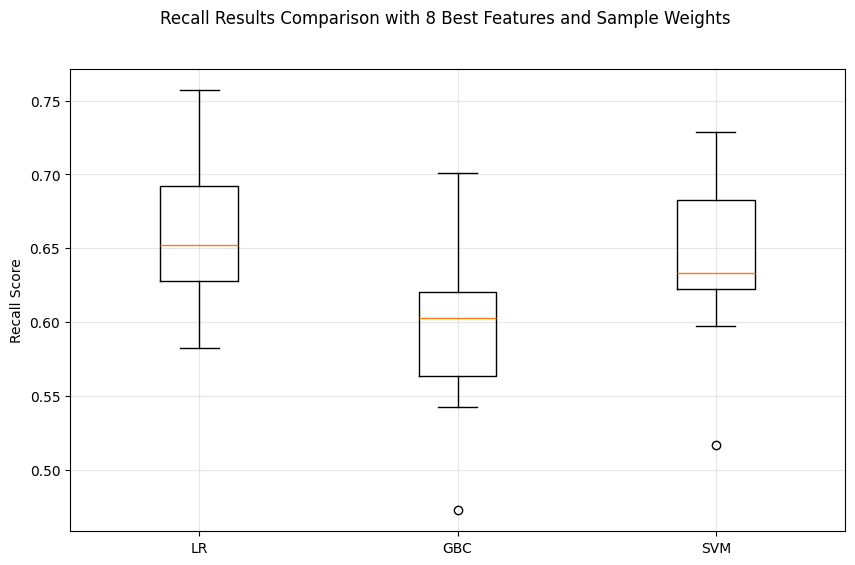

In [19]:
# For reproducibility of operations using Numpy, I'm setting random seed
np.random.seed(42)

# Define KFolding parameters (10 folds, shuffle and random_state)
n_kfolds = 10
kfold = KFold(n_splits=n_kfolds, shuffle=True, random_state=42)

# Defining number of features to all features in the current dataset (k = 8)
k_features = model_features.shape[1]

# Creating lists to receive model functions, results, and names
models = []
recall_scores = []
model_names = []

# Defining models to compare within pipelines.
# Pipelines will contain:
## Scaler for the numeric variables
## Kbest to select features (with predifined random_state for reproducibility)
## The model itself

pipelines = []
pipelines.append(('LR', Pipeline([
    ('scaler', StandardScaler()),
    ('kbest', SelectKBest(score_func=lambda X, y: mutual_info_classif(X, y, random_state=42), k=k_features)),
    ('lr', LogisticRegression())
])))
pipelines.append(('GBC', Pipeline([
    ('scaler', StandardScaler()),
    ('kbest', SelectKBest(score_func=lambda X, y: mutual_info_classif(X, y, random_state=42), k=k_features)),
    ('gbc', GradientBoostingClassifier(random_state=42))
])))
pipelines.append(('SVM', Pipeline([
    ('scaler', StandardScaler()),
    ('kbest', SelectKBest(score_func=lambda X, y: mutual_info_classif(X, y, random_state=42), k=k_features)),
    ('svm', SVC(random_state=42))
])))

results = {}

# I will do a manual cross-validation to apply sample weights per fold
for name, pipeline in pipelines:

    fold_recall_scores = []

    # Getting the index, the list_of training row indexes, and the list of rows used in the validation sets for each fold
    for fold, (rows_used_in_training_set, rows_used_in_validation_set) in enumerate(kfold.split(X, y)):
        X_train_fold = X.iloc[rows_used_in_training_set]
        X_validation_fold = X.iloc[rows_used_in_validation_set]
        y_train_fold = y.iloc[rows_used_in_training_set]
        y_validation_fold = y.iloc[rows_used_in_validation_set]

        # Compute sample weights for the current training fold
        sample_weights_fold = compute_sample_weight('balanced', y_train_fold)

        # Fitting the pipeline with sample weights, depending on the model inside the pipeline
        if 'lr' in pipeline.named_steps:
            pipeline.fit(X_train_fold, y_train_fold, lr__sample_weight=sample_weights_fold)

        elif 'gbc' in pipeline.named_steps:
            pipeline.fit(X_train_fold, y_train_fold, gbc__sample_weight=sample_weights_fold)

        elif 'svm' in pipeline.named_steps:
             pipeline.fit(X_train_fold, y_train_fold, svm__sample_weight=sample_weights_fold)

        # Making predictions on the validation fold
        y_predictions_fold = pipeline.predict(X_validation_fold)

        # Calculating recall for the validation fold
        fold_recall = recall_score(y_validation_fold, y_predictions_fold, average='binary', pos_label=1)
        fold_recall_scores.append(fold_recall)

    recall_scores_cv = np.array(fold_recall_scores)

    recall_scores.append(recall_scores_cv)
    model_names.append(name)
    results[name] = recall_scores_cv

# Printing results
print("Recall Scores for each model:")
for name in model_names:
    mean_recall = results[name].mean()
    std_recall = results[name].std()
    print(f"{name:}: {mean_recall:.2f} ± {std_recall:.2f}")

# Boxplotting the comparison between the models
fig = plt.figure(figsize=(10, 6))
fig.suptitle(f'Recall Results Comparison with {k_features} Best Features and Sample Weights')
ax = fig.add_subplot(111)
plt.boxplot(recall_scores)
ax.set_xticklabels(model_names)
plt.ylabel('Recall Score')
plt.grid(True, alpha=0.3)
plt.show()

I can see that Logistic Regression is the best-performing model among the three, as it yields higher recall scores with greater consistency.

# 2.4) Use the best perfoming model to select best features

Now, with the model selected, I will:

- Determine the optimal number of variables.

- Identify the names of the most important variables.

In [20]:
# Creating a list to receive recall scores
recall_score_list = []

# Defining number of features to all features in the current dataset (k = 8)
number_of_features = model_features.shape[1]


for n in range(1, number_of_features + 1):
    # Feature selection
    selector = SelectKBest(score_func=lambda X, y: mutual_info_classif(X, y, random_state=42), k=n)
    selector.fit(X_train, y_train)

    selected_feature_mask = selector.get_support()
    selected_features = X_train.columns[selected_feature_mask]

    # Reduce X to selected features
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)

    # Initialize model with random_state
    model = LogisticRegression(max_iter= 1000, random_state=42)

    # Compute sample weights
    sample_weights = compute_sample_weight('balanced', y_train)

    # Fit model with sample weights
    model.fit(X_train_selected, y_train, sample_weight=sample_weights)

    # Predict
    y_predictions = model.predict(X_test_selected)

    # Compute recall
    recall = recall_score(y_test, y_predictions, average='binary', pos_label=1)
    recall_score_list.append(recall)

    # Print results
    print(f"Recall: {recall:.2f}. Top {n} features: {list(selected_features)}")

Recall: 0.57. Top 1 features: ['AverageViewingDuration']
Recall: 0.61. Top 2 features: ['AverageViewingDuration', 'ContentDownloadsPerMonth']
Recall: 0.64. Top 3 features: ['AccountAge', 'AverageViewingDuration', 'ContentDownloadsPerMonth']
Recall: 0.61. Top 4 features: ['AccountAge', 'MonthlyCharges', 'AverageViewingDuration', 'ContentDownloadsPerMonth']
Recall: 0.64. Top 5 features: ['AccountAge', 'MonthlyCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth']
Recall: 0.65. Top 6 features: ['AccountAge', 'MonthlyCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'SupportTicketsPerMonth']
Recall: 0.65. Top 7 features: ['AccountAge', 'MonthlyCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth']
Recall: 0.63. Top 8 features: ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 

The highest recall score is achieved with either 6 or 7 features. I will inspect this further: since it is a tie, I will select the number of features that provides the higher accuracy score, given the same recall result.

In [21]:
# Creating a list to receive scores, and resetting the recall list
recall_score_list = []
accuracy_score_list = []
precision_score_list = []
f1_score_list = []

# Creating list to receive feature names
selected_features_list = []

# Running feature selection one more time
# This time computing accuracy, precision, and f1 score besides recall
for n in range(1, number_of_features + 1):

    # Feature selection
    selector = SelectKBest(score_func=lambda X, y: mutual_info_classif(X, y, random_state=42), k=n)
    selector.fit(X_train, y_train)

    selected_feature_mask = selector.get_support()
    selected_features = X_train.columns[selected_feature_mask]
    selected_features_list.append(list(selected_features)) # Storing the selected features

    # Reducing X to selected features
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)

    # Initializing model with random_state
    model = LogisticRegression(max_iter = 1000, random_state=42)

    # Computing sample weights
    sample_weights = compute_sample_weight('balanced', y_train)

    # Fitting the model with sample weights
    model.fit(X_train_selected, y_train, sample_weight=sample_weights)

    # Predicting results
    y_predictions = model.predict(X_test_selected)

    # Compute recall, precision, f1 and accuracy
    recall = recall_score(y_test, y_predictions, average='binary', pos_label=1)
    precision = precision_score(y_test, y_predictions, average='binary', pos_label=1)
    f1 = f1_score(y_test, y_predictions, average='binary', pos_label=1)
    accuracy = accuracy_score(y_test, y_predictions)

    # Adding the results to the lists we created earlier
    recall_score_list.append(recall)
    precision_score_list.append(precision)
    f1_score_list.append(f1)
    accuracy_score_list.append(accuracy)

    print(f" k={n}, Recall: {recall:.3f}, Precision: {precision:.3f}, F1-Score: {f1:.3f}, Accuracy: {accuracy:.3f}")

 k=1, Recall: 0.568, Precision: 0.276, F1-Score: 0.371, Accuracy: 0.585
 k=2, Recall: 0.605, Precision: 0.300, F1-Score: 0.401, Accuracy: 0.611
 k=3, Recall: 0.643, Precision: 0.318, F1-Score: 0.425, Accuracy: 0.626
 k=4, Recall: 0.609, Precision: 0.310, F1-Score: 0.411, Accuracy: 0.623
 k=5, Recall: 0.635, Precision: 0.331, F1-Score: 0.436, Accuracy: 0.645
 k=6, Recall: 0.647, Precision: 0.344, F1-Score: 0.449, Accuracy: 0.658
 k=7, Recall: 0.647, Precision: 0.339, F1-Score: 0.445, Accuracy: 0.652
 k=8, Recall: 0.628, Precision: 0.333, F1-Score: 0.435, Accuracy: 0.649


In [22]:
# Find the maximum recall score
max_recall = max(recall_score_list)

# Find all indices (k values - 1) that achieve the maximum recall
indices_with_max_recall = [i for i, recall in enumerate(recall_score_list) if recall == max_recall]

# Among those, find the minimum k (index + 1)
min_k_at_max_recall = min(indices_with_max_recall) + 1

# Find all indices that achieve the minimum k at maximum recall
indices_at_min_k_max_recall = [i for i in indices_with_max_recall if i + 1 == min_k_at_max_recall]

# If 2 or more # of features achieve the maximum recall, select the one with highest accuracy
if len(indices_at_min_k_max_recall) > 1:
    # Get the accuracy scores for these specific indices
    accuracy_scores_at_min_k_max_recall = [accuracy_score_list[i] for i in indices_at_min_k_max_recall]
    # Find the index among these that has the higher accuracy
    index_with_max_accuracy_at_min_k_max_recall = indices_at_min_k_max_recall[accuracy_scores_at_min_k_max_recall.index(max(accuracy_scores_at_min_k_max_recall))]
    optimal_k_index = index_with_max_accuracy_at_min_k_max_recall
else:
    # If no tie in k for max recall score, the optimal index is simply the one corresponding to min_k_at_max_recall
    # Converting back to 0-based index
    optimal_k_index = min_k_at_max_recall - 1

# Printing the number of features, and the features names for the optimal model
optimal_k = optimal_k_index + 1
selected_features = selected_features_list[optimal_k_index]
print(f"Optimal Number of Features (k): {optimal_k}")
print(f"Selected Features: {selected_features}")

Optimal Number of Features (k): 6
Selected Features: ['AccountAge', 'MonthlyCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'SupportTicketsPerMonth']


**Optimal number of features (k)** = 6

**Variable names** = 'AccountAge', 'MonthlyCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'SupportTicketsPerMonth'


There is no improvement in recall when selecting more than 6 features. In addition to the performance gains (recall and accuracy), models with fewer features are preferable because they are simpler, require less data, are generally easier to interpret, and run faster.

# 2.5) Finetune hyperparameters

Now, I will study potential changes in the Logistic Regression hyperparameters.

- **'C':** Controls the strength of the regularization applied to the model, helping reduce potential overfitting.

- **'Solver':** Determines the optimization algorithm used to minimize the logistic loss function, by testing whether 'liblinear' or 'lbfgs' performs better.

- **'Penalty':** The type of regularization to apply to the model coefficients ('l1', or 'l2').

In [23]:
# Setting X to the 6 selected features
X = model_features[selected_features]
y = target

# Creating the Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42)) # Adding random_state for reproducibility
])

# Defining the parameter grid to tune the hyperparameters
param_grid = [
    {'lr__C': [0.001, 0.01, 0.1, 1, 10, 100], 'lr__solver': ['liblinear'], 'lr__penalty': ['l1', 'l2']},
    {'lr__C': [0.001, 0.01, 0.1, 1, 10, 100], 'lr__solver': ['lbfgs'], 'lr__penalty': ['l2']} # lbfgs only supports l2
]

# Defining recall as the scoring metric
recall_scorer = make_scorer(recall_score, pos_label=1)

# Defining number of splits for cross validation during tuning
n_splits_cv = 5
skf = StratifiedKFold(n_splits=n_splits_cv, shuffle=True, random_state=42)

# Computing sample weights for the training set
sample_weights_train = compute_sample_weight('balanced', y_train)

# Setting up the grid search
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=skf, # Use StratifiedKFold for CV
    scoring=recall_scorer, # Optimize for Recall
    n_jobs=-1 # Use all available cores
)

# Fitting the grid with the training data, passing the sample weights
grid_search.fit(X_train[selected_features], y_train, lr__sample_weight=sample_weights_train)

# Getting the parameters that result in the highest recall score
best_parameters = grid_search.best_params_

# Printing the best parameters
print(f"Best Hyperparameters for the model: {best_parameters}")

Best Hyperparameters for the model: {'lr__C': 0.01, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}


I found that the model works best using a strong regularization ('C') to prevent overfitting, alongside a liblinear solver and a l1 penalty.

## RESULTS

I will use the final features and the optimized hyperparameters to evaluate the final results of the selected model.

**Final features:**
- 'AccountAge'
- 'MonthlyCharges'
- 'ViewingHoursPerWeek'
- 'AverageViewingDuration'
- 'ContentDownloadsPerMonth'
- 'SupportTicketsPerMonth'

**Selected Model:**
- Logistic Regression

**Optimized Hyperparameters:**
- **'lr__C':** 0.01
- **'lr__penalty':** 'l1'
- **'lr__solver':** 'liblinear'

In [24]:
# Applying the best patarameters to the pipeline

X = model_features[selected_features]
y = target

churn_predictor_pipeline = Pipeline([
     ('scaler', StandardScaler()),
     ('lr', LogisticRegression(C=0.01,
                               penalty='l1',
                               solver='liblinear',
                               random_state=42))
])

sample_weights = compute_sample_weight('balanced', y_train)

churn_predictor_pipeline.fit(X_train, y_train, lr__sample_weight=sample_weights)

final_predictions = churn_predictor_pipeline.predict(X_test)

final_recall = recall_score(y_test, final_predictions, average='binary', pos_label=1)
final_precision = precision_score(y_test, final_predictions, average='binary', pos_label=1)
final_f1 = f1_score(y_test, final_predictions, average='binary', pos_label=1)
final_accuracy = accuracy_score(y_test, final_predictions)

print("")
print("Metrics applying optimized parameters:")
print("")
print(f"Recall: {final_recall:.3f}")
print(f"Precision: {final_precision:.3f}")
print(f"F1-Score: {final_f1:.3f}")
print(f"Accuracy: {final_accuracy:.3f}")


Metrics applying optimized parameters:

Recall: 0.729
Precision: 0.314
F1-Score: 0.439
Accuracy: 0.599


Our **final recall score was 72.9%**. This means that, out of every 10 users intending to leave the service, the model is able to successfully identify about 7.

I validated our initial hypotheses:

- **Churned customers are likely to show identifiable characteristics and behavior patterns**: the model highlighted age, total monthly charges, hours of weekly service usage, average session duration, number of downloads, and number of support tickets as key differentiators.

- **Balancing the dataset was necessary to achieve satisfactory results**: without balancing, recall was very low.

To summarize the entire process:

- I began with a large dataset of over 243,000 records and selected a subset of users that were more meaningful from a revenue potential perspective.

- By analyzing this subset, I identified variables most likely to differentiate churned from non-churned users and used these as inputs for a machine learning model.

- Running the model initially showed that balancing the dataset increased recall from 11.3% to over 60%.

- I then performed cross-validation to compare models (Logistic Regression, Gradient Boosting, and SVM). Logistic Regression consistently delivered the best recall scores.

- Next, I optimized the number of features and found that using 6 features with Logistic Regression produced a recall of 64.7%.

- Finally, I fine-tuned the hyperparameters (regularization strength, solver, and penalty type), which raised recall to our final score of 72.9%.

Given the major improvents in Recall score, the process generated satisfactory results. More importantly, **it demonstrated how a subscription-based business could benefit significantly from using a machine learning model to predict churn, rather than relying on manual predictions**.
